In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
import seaborn as sns

Creamos archivos sinteticos.

In [5]:
def char_range(a, b):
    for c in range(ord(a), ord(b)+1):
        yield chr(c)

def next(s):
    if s == '':
        return 'a'
    elif s[-1] != 'z':
        return s[:-1] + chr(ord(s[-1])+1)
    else:
        return next(s[:-1])+'a'

In [ ]:
n = 20000000
for c in char_range('a', 'z'):
    word = ''
    f = open(f'../input/synthetic_unbalanced/{c}', 'w')
    for i in range(n):
        f.write(c + word + '\n')
        word = next(word)
    f.close()

Hacemos los archivos para el bucket desbalanceado, agarrando de los datos sinteticos.

In [21]:
n = 11                                                        ## Cantidad de archivos a meter para cada letra + 1
letter_list =  ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']     
cant_words = 1000000                                            ## steps
folder_output = f'../input/Kaggle/unbalanced_letter'
for i in range(0,1):
    letter = letter_list[i]
    path = f'../input/synthetic_unbalanced/{letter}'
    for i in range(1,n+1):
        f = open(path, 'r')
        words = f.readlines()[i*cant_words: (i+1)*cant_words]
        letter_i = letter + '_' + str(i)
        path_file = f'{folder_output}/{letter_i}'
        o = open(path_file, 'w')
        for j in range(0, len(words)):
            o.write(words[j])
    os.remove(path_file)                                         ## Atado con alambre 



Celda para deletear los archivos anteriores

In [ ]:
for letter in letter_list:
    for i in range(1,n):
        letter_i = letter + '_' + str(i)
        path_file = f'{folder_output}/{letter_i}'
        os.remove(path_file)

Graficar el experimento.


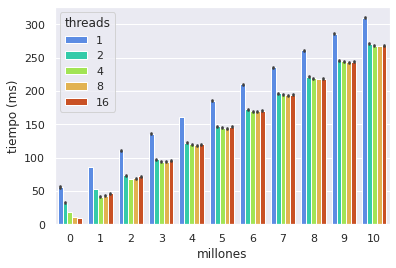

In [55]:

## Hay 2 valores por archivo.
## y <- tiempo ;; x <- cantidad de datos ;; 2 funciones para 1 y 16 threads, sacando como valor al promedio de todas las letras en el size correspondiente.
sns.set_theme()
L = []
for i in range(1,76):
    L += [pd.read_csv(f'../output/unbalanced/unbalanced_part_{i}')]
data = pd.concat(L,ignore_index=True)[['threads','size','time']]
data['time'] *= 1000
ax = sns.barplot(data = data,x = 'size',y = 'time',hue = 'threads',palette = 'turbo')
ax.set(ylabel= 'tiempo (ms)')
ax.set(xlabel= 'millones')
plt.savefig('../figuras/unbalanced_10k.pdf',format = 'pdf')



Graficamos los experimentos listos.


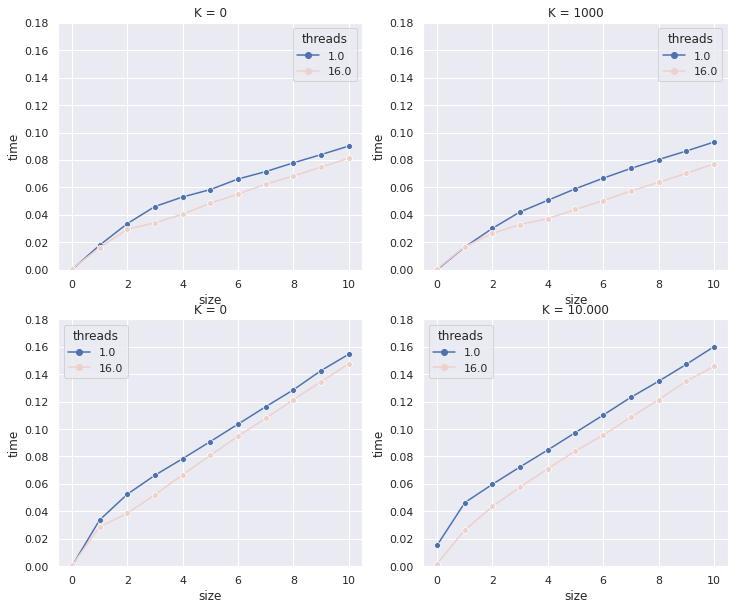

In [3]:
t_threads = 16
folder = '../output/unbalanced/unbalanced_listos'
lista_experimentos = ['/small_k0','/small_k20','/big_k0','/big_k10mil']
lista_titulos = ['K = 0','K = 1000','K = 0','K = 10.000']
sns.set_theme()
fig, ax = plt.subplots(2,2,figsize=(12,10))
for i in range(0,2):
    for j in range(0,2):
        data = pd.read_csv(folder + lista_experimentos[i*2+j])
        data_multithreaded = data[data['threads'] == t_threads].groupby('size').mean()
        data_singlethreaded = data[data['threads'] == 1].groupby('size').mean()
        ax[i][j].set(title = lista_titulos[i*2+j])
        ax[i][j].set(ylim = (0,0.18))
        sns.lineplot(data = data_singlethreaded,x = 'size',y = 'time',ax = ax[i][j],markers = True,hue = 'threads',style = 'threads')
        sns.lineplot(data = data_multithreaded,x = 'size',y = 'time',ax = ax[i][j],markers = True,hue = 'threads',style = 'threads')


        ## Agregar titulos n = datos unbalanced maximo steps = 500k -> n = 5millones ;; steps = 250k -> n = 2.5 millones